In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score,recall_score,precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Freddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('labeled.csv',sep=",")

In [5]:
df.shape

(14412, 2)

In [6]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [7]:
df["toxic"] = df["toxic"].apply(int)

In [8]:
df["toxic"].value_counts()
gr = df.groupby("toxic")
# df.loc[['toxic']]

In [9]:
# df.filter(lambda x: x["toxic"] == 0)

In [10]:
for c in df[df['toxic'] == 1]['comment'].head(5):
    print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [11]:
for c in df[df['toxic'] == 0]['comment'].head(3):
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [12]:
df[df['toxic'] ==0].head()

,comment,toxic
6,В шапке были ссылки на инфу по текущему фильму...,0
12,"Почитайте посты у этого автора,может найдете ч...",0
17,Про графику было обидно) я так то проходил все...,0
28,https: pp.userapi.com c848520 v848520411 11627...,0
35,"Возьмём как пример Россию, западноевропейские ...",0


In [13]:
train_df,test_df = train_test_split(df,test_size=500)

In [14]:
test_df.shape

(500, 2)

In [15]:
test_df["toxic"].value_counts()

0    323
1    177
Name: toxic, dtype: int64

In [16]:
train_df['toxic'].value_counts()

0    9263
1    4649
Name: toxic, dtype: int64

In [17]:
sentence_example = df.iloc[1]["comment"]
tokens = word_tokenize (sentence_example,language='russian')
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words("russian")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words] 
snowball = SnowballStemmer(language='russian')
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [20]:
print(f"исходный текст: {sentence_example}")
print('-'*10)
print(f"токены:{tokens}")
print('-'*10)
print(f"токены без пунктауации:{tokens_without_punctuation}")
print('-'*10)
print(f"токены буз пунктцации и стоп слов:{tokens}")
print('-'*10)
print(f"токены после стемминга:{stemmed_tokens}")


исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

----------
токены:['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
----------
токены без пунктауации:['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
----------
токены буз пунктцации и стоп слов:['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
----------
токены после стемминга:['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']


In [21]:
snowball = SnowballStemmer(language='russian')
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence:str,remove_stop_words:bool=True):
    tokens = word_tokenize(sentence,language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [22]:
tokenize_sentence(sentence_example)


['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [23]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x,remove_stop_words=True))

In [24]:
features = vectorizer.fit_transform(train_df["comment"])

In [25]:
model = LogisticRegression(random_state=0)
model.fit(features,train_df["toxic"])

LogisticRegression(random_state=0)

In [26]:
model.predict(features[0])

array([1], dtype=int64)

In [29]:
train_df["comment"].iloc[1]

'Когда было иначе, лол. Легаси? Или ты по темпесту соскучился?\n'

In [30]:
model_pipeline = Pipeline([
    ("vectorizer",TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x,remove_stop_words=True))),
    ("model",LogisticRegression(random_state=0))
])

In [64]:
model_pipeline.fit(train_df["comment"],train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001FADE977670>)),
                ('model', LogisticRegression(random_state=0))])

In [32]:
model_pipeline.predict(["Привет у меня всё нормально"])

array([0], dtype=int64)

In [33]:
model_pipeline.predict(["ты скотина"])

array([1], dtype=int64)

In [36]:
model_pipeline.predict(["даунов"])

array([1], dtype=int64)

In [37]:
model_pipeline.predict(["добрый день"])

array([0], dtype=int64)

In [79]:
prec,rec,threshold= precision_recall_curve(y_true=test_df['toxic'],probas_pred=model_pipeline.predict_proba(test_df["comment"])[:,1])

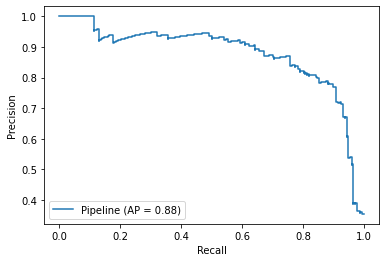

In [45]:
plot_precision_recall_curve(estimator=model_pipeline,X=test_df["comment"],y=test_df["toxic"])

In [46]:
np.where(prec>0.95)

(array([473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485,
        486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497],
       dtype=int64),)

In [55]:
threshold[473]

0.8547068481783698

In [56]:
precision_score(y_true=test_df["toxic"],y_pred=model_pipeline.predict_proba(test_df["comment"])[:,1] > threshold[473])

0.9565217391304348

In [59]:
recall_score(y_true=test_df["toxic"],y_pred = model_pipeline.predict_proba(test_df["comment"])[:,1] > threshold[473])

0.12429378531073447

In [62]:
grid_pipeline = Pipeline([
    ("vectorizer",TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x,remove_stop_words=True))),
    ("model",
      GridSearchCV(
      LogisticRegression(random_state=0),
      param_grid = {'C':[0.1,1,10.]},
      cv=3,
        verbose=4))
    
])

In [65]:
grid_pipeline.fit(train_df["comment"],train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.685, total=   0.3s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................... C=0.1, score=0.688, total=   0.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ............................... C=0.1, score=0.686, total=   0.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV] ................................. C=1, score=0.840, total=   0.6s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.832, total=   0.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.844, total=   0.7s
[CV] C=10.0 ..........................................................


C:\Users\Freddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .............................. C=10.0, score=0.863, total=   0.8s
[CV] C=10.0 ..........................................................


C:\Users\Freddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .............................. C=10.0, score=0.864, total=   0.8s
[CV] C=10.0 ..........................................................


C:\Users\Freddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.7s finished


[CV] .............................. C=10.0, score=0.867, total=   0.9s


C:\Users\Freddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001FADFE768B0>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [82]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer",TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x,remove_stop_words=True))),
    ("model",LogisticRegression(random_state=0,C=10.))])

In [84]:
model_pipeline_c_10.fit(train_df["comment"],train_df["toxic"])

C:\Users\Freddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001FADFF85B80>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [86]:
prec_с_10,rec_с_10,thresholds_с_10= precision_recall_curve(y_true=test_df['toxic'],probas_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:,1])

In [89]:
np.where(prec_с_10 > 0.95)

(array([430, 431, 432, 433, 465, 466, 467, 468, 469, 470, 471, 472, 473,
        474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
        487, 488, 489, 490, 491, 492, 493, 494], dtype=int64),)

In [92]:
precision_score(y_true=test_df["toxic"],y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:,1] > thresholds_с_10[430])

0.9523809523809523

In [93]:
recall_score(y_true=test_df["toxic"],y_pred = model_pipeline_c_10.predict_proba(test_df["comment"])[:,1] > thresholds_с_10[430])

0.3389830508474576